In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

지하철 유무임별 이용현황 데이터 정제하기

인원숫자 데이터 정수로 바꾸기

유임 승차 비율이 가장 높은 역은 어디일까?

In [8]:
f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data:
    for i in range(4,8):
        row[i] = int(row[i])
    if row[6] !=0 and (row[4]+row[6]) > 1000000:
        rate = row[4] / (row[4]+row[6])    
        if rate>mx:
            mx=rate
            print(row, round(rate, 2))
            

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764] 0.87
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062] 0.88
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592] 0.92
['2019-01', '2호선', '0212', '건대입구', 1238362, 1367192, 96044, 100954] 0.93
['2019-01', '2호선', '0219', '삼성(무역센터)', 1708765, 1751738, 130382, 122279] 0.93
['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95


출근시간대 가장 많이 타는 사람들(아침 7시)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

<BarContainer object of 598 artists>

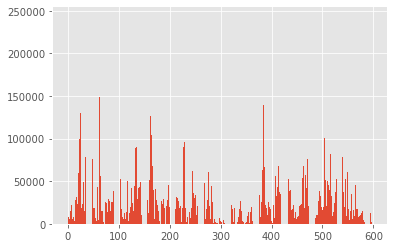

In [20]:
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
result = []

for row in data:
    row[4:]=map(int, row[4:])
    result.append(row[10])

print(len(result))
print(result)      

plt.style.use('ggplot')
plt.bar(range(len(result)), result)
   

아침7~9시 승차인원 더하여 막대그래프

598
[180710, 30499, 32324, 30062, 26304, 62354, 72328, 82263, 153552, 24346, 26708, 45112, 29946, 17964, 37082, 104680, 142468, 127372, 23985, 80426, 89965, 246059, 276096, 360857, 145231, 464389, 203691, 69540, 72061, 102097, 74561, 197539, 107487, 66181, 99468, 269167, 326043, 495340, 287297, 809541, 336368, 496800, 265643, 420135, 126924, 130563, 176957, 152631, 245162, 143625, 66212, 90443, 62628, 29906, 22236, 13660, 8703, 81592, 110910, 16833, 11649, 230092, 441401, 174463, 163337, 194606, 44002, 55516, 63766, 26275, 9877, 12768, 2, 23502, 104453, 98509, 89179, 70398, 56165, 59665, 149843, 32549, 120164, 127130, 50747, 28471, 73318, 11932, 79676, 63187, 121500, 69530, 71628, 81569, 137553, 246500, 162644, 265806, 394404, 373397, 161413, 272135, 246388, 161961, 112848, 73431, 28307, 34384, 48855, 40408, 32275, 46380, 71153, 20355, 42874, 49090, 16592, 166176, 253564, 13110, 34626, 44693, 92581, 70999, 103862, 150146, 29520, 83632, 112754, 42963, 119190, 117569, 91940, 218030, 6988

<BarContainer object of 598 artists>

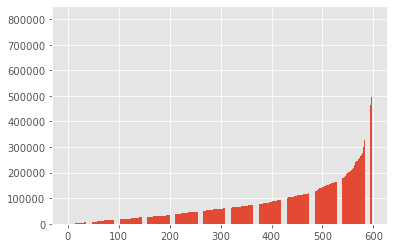

In [24]:
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
result = []

for row in data:
    row[4:]=map(int, row[4:])
    result.append(sum(row[10:15:2]))
   

print(len(result))
print(result)      
result.sort()
plt.style.use('ggplot')
plt.bar(range(len(result)), result)
   

7~9시 사이 승차인원 최대 역과 호선을 찾아 출력

In [26]:
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
mx=0
mx_station=''
for row in data:
    row[4:]=map(int, row[4:])
    if sum(row[10:15:2]) > mx:
        mx = sum(row[10:15:2])
        mx_station = row[3] +'('+row[1]+')'
    
print(mx_station, mx)

   

신림(2호선) 809541


7~9시 사이 하차인원 최대 역과 호선을 찾아 출력

In [36]:
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
mx=0
mx_station=''
for row in data:
    row[4:]=map(int, row[4:])
    if sum(row[11:16:2]) > mx:
        mx = sum(row[11:16:2])
        mx_station = row[3] +'('+row[1]+')'
    
print(mx_station, mx)

   

강남(2호선) 984427


밤11시에 사람들이 가장 많이 타고 내리는 역 찾기

In [50]:
f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
mx=0
mx_station=''
t = int(input('몇시의 승차 인원이 가장 많은 역이 궁금하세요? :'))
for row in data:
    row[4:]=map(int, row[4:])
    i = row[4+(t-4)*2]
    if i > mx:
        mx = i
        mx_station = row[3] +'('+row[1]+')'
    
print(mx_station, mx)

   

강남(2호선) 145504


올림픽 메달


In [58]:
df = pd.read_html('https://en.wikipedia.org/wiki/All-time_Olympic_Games_medal_table', header=0, index_col=0)

summer =df[1].iloc[1:, :5]
summer

,Summer Olympic Games,Summer Olympic Games.1,Summer Olympic Games.2,Summer Olympic Games.3,Summer Olympic Games.4
Team,,,,,
Afghanistan (AFG),14,0,0.0,2.0,2
Algeria (ALG),13,5,4.0,8.0,17
Argentina (ARG),24,21,25.0,28.0,74
Armenia (ARM),6,2,6.0,6.0,14
Australasia (ANZ) [ANZ],2,3,4.0,5.0,12
...,...,...,...,...,...
Zimbabwe (ZIM) [ZIM],13,3,4.0,1.0,8
Independent Olympic Athletes (IOA) [IOA],3,1,0.0,1.0,2
Independent Olympic Participants (IOP) [IOP],1,0,1.0,2.0,3


In [62]:
summer.columns=['경기수','금','은','동','계']
print(summer)
summer.to_excel('하계.xlsx')

                                             경기수     금       은       동      계
Team                                                                         
Afghanistan (AFG)                             14     0     0.0     2.0      2
Algeria (ALG)                                 13     5     4.0     8.0     17
Argentina (ARG)                               24    21    25.0    28.0     74
Armenia (ARM)                                  6     2     6.0     6.0     14
Australasia (ANZ) [ANZ]                        2     3     4.0     5.0     12
...                                           ..   ...     ...     ...    ...
Zimbabwe (ZIM) [ZIM]                          13     3     4.0     1.0      8
Independent Olympic Athletes (IOA) [IOA]       3     1     0.0     1.0      2
Independent Olympic Participants (IOP) [IOP]   1     0     1.0     2.0      3
Mixed team (ZZX) [ZZX]                         3     8     5.0     4.0     17
Totals                                        28  5116  5080.0  

In [69]:
index = pd.date_range('1/1/2000', periods=8)
print(index)
df=pd.DataFrame(np.random.rand(8,3), index=index, columns = list('ABC') )
print(df['B']>0.4)
df2 = df[df['B']>0.4]
df2

df2 = df2.T
df2

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')
2000-01-01    False
2000-01-02     True
2000-01-03     True
2000-01-04     True
2000-01-05    False
2000-01-06    False
2000-01-07     True
2000-01-08     True
Freq: D, Name: B, dtype: bool


,2000-01-02,2000-01-03,2000-01-04,2000-01-07,2000-01-08
A,0.047432,0.198618,0.478199,0.299086,0.395296
B,0.826519,0.590588,0.654271,0.573892,0.753595
C,0.250416,0.900750,0.602943,0.310699,0.192340


In [71]:
index = pd.date_range('1/1/2000', periods=8)
print(index)
df=pd.DataFrame(np.random.rand(8,3), index=index, columns = list('ABC'))
df['D'] = df['A'] / df['B']
df['E'] =np.sum(df, axis = 1)
df

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08'],
              dtype='datetime64[ns]', freq='D')


,A,B,C,D,E
2000-01-01,0.294815,0.609825,0.561341,0.483442,1.949424
2000-01-02,0.940928,0.395536,0.387784,2.378867,4.103115
2000-01-03,0.447742,0.998728,0.996446,0.448312,2.891228
2000-01-04,0.508216,0.112409,0.752214,4.521136,5.893975
2000-01-05,0.543575,0.810082,0.424160,0.671013,2.448829
2000-01-06,0.449183,0.475146,0.057991,0.945359,1.927679
2000-01-07,0.184242,0.889396,0.285381,0.207154,1.566173
2000-01-08,0.075246,0.502796,0.185848,0.149655,0.913545


판다스로 인구구조 분석하기

In [73]:
df = pd.read_csv('age.csv', encoding='cp949', index_col = 0)

df = df.div(df['총인구수'], axis = 0)
del df['총인구수'], df['연령구간인구수']
print(df)

KeyError: '총인구수'